# EDA-4

In [59]:
import pandas as pd
import numpy as np

from afinn import Afinn

## 1. 导入数据 

In [69]:
df=pd.read_csv("../../Data Preparation/原始数据/cleaned_senti_reviews.csv")

In [70]:
df.head(2)

,Unnamed: 0,reviewer_id,listing_id,date,reviewer_name,comments,name,description,neighborhood_overview,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,polarity_score,sentiment
0,0,8557223,49091,2013-10-21,Jared,Fran was absolutely gracious and welcoming. Ma...,COZICOMFORT LONG TERM STAY ROOM 2,This is Room No. 2.(available after Jan 15 201...,NaN,266763,...,10.0,10.0,10.0,8.0,8.0,f,2,0.02,0.9615,pos
1,1,1356099,50646,2014-04-18,James,A comfortable room in a smart condo developmen...,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,227796,...,10.0,10.0,10.0,9.0,9.0,f,1,0.30,0.9484,pos


In [71]:
comment=df[["comments","polarity_score","sentiment"]]

In [72]:
comment.head()

,comments,polarity_score,sentiment
0,Fran was absolutely gracious and welcoming. Ma...,0.9615,pos
1,A comfortable room in a smart condo developmen...,0.9484,pos
2,Stayed over at Sujatha's house for 3 good nigh...,0.9879,pos
3,It's been a lovely stay at Sujatha's. The room...,0.9627,pos
4,"We had a great experience. A nice place, an am...",0.9274,pos


## 2. 处理特征 

### 2.1 comments特征 

#### 删除空值的样本

In [73]:
comment.isnull().value_counts()

comments  polarity_score  sentiment
False     False           False        130632
True      False           False             1
dtype: int64

直接将空的评论的样本直接删除

In [74]:
comment=comment.dropna(subset=["comments"])

In [75]:
comment.isnull().value_counts()

comments  polarity_score  sentiment
False     False           False        130632
dtype: int64

### 2.2 sentiment_score特征 <font color=blue>**(跳过此步骤)**</font>

利用AFINN基于每一条comment生成review scores

In [ ]:
afinn = Afinn()

In [ ]:
comment["sentiment_score"]=comment.comments.apply(lambda x: afinn.score(x))

In [ ]:
comment.head(3)

### 2.3  polarity 特征<font color=blue>**(跳过此步骤)**</font>

表示评论的特征是positive还是negative

In [ ]:
def polar(x):
    if x>0:
        return 1
    elif x<0:
        return 0
    else:
        return -1

In [ ]:
comment["polarity"]=comment.sentiment_score.apply(lambda x:polar(x))

In [ ]:
comment.head(5)

### 3. 探索问题：开始画云

In [76]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [77]:
from wordcloud import WordCloud, STOPWORDS

In [78]:
comment.head(3)

,comments,polarity_score,sentiment
0,Fran was absolutely gracious and welcoming. Ma...,0.9615,pos
1,A comfortable room in a smart condo developmen...,0.9484,pos
2,Stayed over at Sujatha's house for 3 good nigh...,0.9879,pos


#### 提取postive的评论 

In [79]:
positive_comments=comment[comment.sentiment=="pos"]

In [80]:
positive_comments.head()

,comments,polarity_score,sentiment
0,Fran was absolutely gracious and welcoming. Ma...,0.9615,pos
1,A comfortable room in a smart condo developmen...,0.9484,pos
2,Stayed over at Sujatha's house for 3 good nigh...,0.9879,pos
3,It's been a lovely stay at Sujatha's. The room...,0.9627,pos
4,"We had a great experience. A nice place, an am...",0.9274,pos


#### 提取negative的评论

In [81]:
negative_comments=comment[comment.sentiment=="neg"]

<font color=green>**仍然有中文！（待处理）**</font>

In [82]:
negative_comments.head().loc[267].comments

'我同行的朋友说Bianca的家是她新加坡之行最喜欢的地方｡虽然在郊区,但这根本不算什么,新加坡很小,她这离地铁站就两分钟步行, (Hidden by Airbnb) 都很方便快速｡房子比图片上还要美,屋子里装饰品非常多,你处处都会发现惊喜｡我最喜欢的是她每天早上都会给我们做早餐榨果汁,而且还不重样｡跟她聊天也很开心,幽默可爱,英文容易听懂｡Thank you Bianca,I will miss you!'

#### 读取背景图片

In [83]:
background = np.array(Image.open("../Pictures/Singapore.png"))

#### 设置stopwords 

In [84]:
stopwords = set(STOPWORDS)
stopwords.update({"room","place","Singapore","apartment","everything","und","de",
                 "stay","lot","need","really","Thank",
                 "Airbnb","one","guest","good","day","night"})

#### 建立模型和训练模型 

In [85]:
from matplotlib import colors

In [86]:
wc = WordCloud(background_color="white", 
               max_words=2000, 
               mask=background,
               stopwords=stopwords, 
               contour_width=3, 
               contour_color='steelblue',
               scale=2,
               #colormap=
              )

##### positive cloud 

In [87]:
# generate word cloud
wc.generate(" ".join(positive_comments.comments.tolist()))

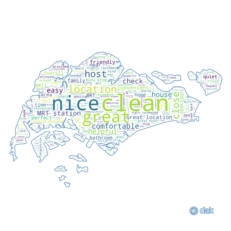

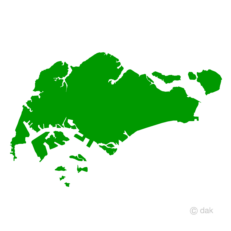

In [88]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(background, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")


wc.to_file("../Pictures/result_positive.png")

plt.show()

##### negative cloud

In [89]:
wc.generate(" ".join(negative_comments.comments.tolist()))

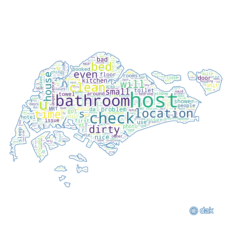

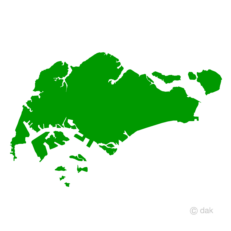

In [90]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(background, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")


wc.to_file("../Pictures/result_negative.png")

plt.show()